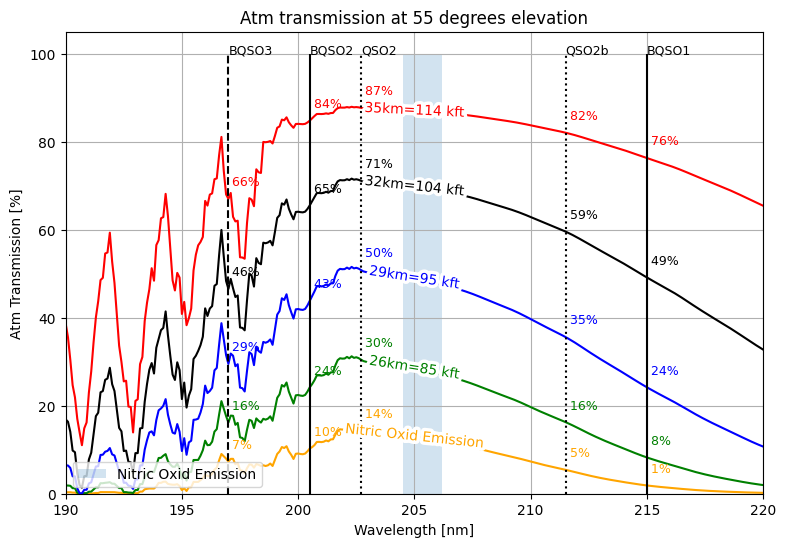

In [16]:
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np
from labellines import labelLines

# labelLines(plt.gca().get_lines(),align=True,xvals=[205,205,205,205,205],fontsize=10)

cat = Table.read("/Users/Vincent/Github/FIREBallIMO/FireBallIMO/Atmosphere/AtmTrans_wave_180-239-0.1000nm_Alt_25-45.csv")
plt.figure(figsize=(9,6))
plt.fill_between([204.5,206.2],[0,0],[100,100], label="Nitric Oxid Emission",alpha=0.2) 
plt.legend(loc="lower left")     

for col,c in zip(cat.colnames[2:-5][::3],["orange","green","blue","black","red"]):
    plt.plot(cat["Wavelength"],np.convolve(100*cat[col],np.ones(10)/10,mode="same"),label=col[6:] + "=%i kft"%(float(col[-4:-2])/0.3048),c=c)
labelLines(plt.gca().get_lines(),align=True,xvals=[205,205,205,205,205],fontsize=10)

for label, line, ls in zip(["BQSO2","BQSO1","BQSO3","QSO2","QSO2b"],[200.5,215,197,202.7,211.5],["-","-","--",":",":"]):
    plt.vlines(line,0,100,ls=ls,color="k")
    plt.text(line,100,label,fontsize=9)
    for col,c in zip(cat.colnames[2:-5][::3],["orange","green","blue","black","red"]):
        
        plt.text(line,3+np.convolve(100*cat[col],np.ones(10)/10,mode="same")[np.argmin(abs(cat["Wavelength"]-line))]," %i%%"%(np.convolve(100*cat[col],np.ones(10)/10,mode="same")[np.argmin(abs(cat["Wavelength"]-line))]),fontsize=9,c=c)
        
    # plt.text()
# plt.vlines(201,0,100,ls=":",color="k",label="BQSO2")
# plt.vlines(215,0,100,ls="-",color="k",label="BQSO1")
# plt.vlines(197,0,100,ls="--",color="k",label="BQSO3")
# plt.vlines(202,0,100,ls=":",color="gray",label="QSO2")
# plt.legend()
plt.xlim((190,220))
plt.ylim(ymin=0)
plt.grid()
plt.xlabel("Wavelength [nm]")
plt.ylabel("Atm Transmission [%]")
plt.title("Atm transmission at 55 degrees elevation")
plt.show()